In [4]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [6]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [7]:
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [0]:
# Building the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#  = Dropout(0.5)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# GlobalMaxpooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 47s 30ms/step - loss: 1.1240 - accuracy: 0.6037 - val_loss: 1.0046 - val_accuracy: 0.6478
Epoch 2/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.9048 - accuracy: 0.6860 - val_loss: 0.8782 - val_accuracy: 0.7010
Epoch 3/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.7935 - accuracy: 0.7294 - val_loss: 0.9291 - val_accuracy: 0.6853
Epoch 4/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.7172 - accuracy: 0.7546 - val_loss: 0.6578 - val_accuracy: 0.7786
Epoch 5/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.6549 - accuracy: 0.7773 - val_loss: 0.6452 - val_accuracy: 0.7815
Epoch 6/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.6145 - accuracy: 0.7899 - val_loss: 0.6335 - val_accuracy: 0.7862
Epoch 7/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.5780 - accuracy: 0.8041 - val_loss: 0.5973 -

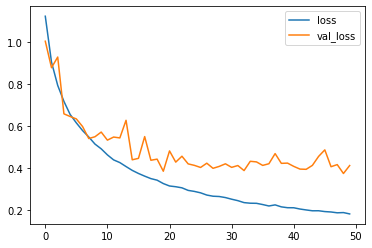

In [12]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

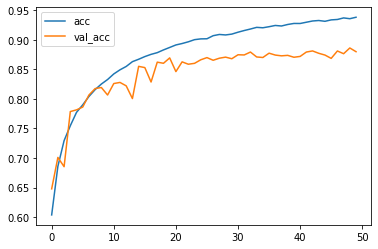

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()